In [1]:
import pandas as pd
import numpy as np
import math
from random import choices
from datetime import datetime
import statistics

In [2]:
import devanalyst.simulation.statics as S_
import devanalyst.simulation.GenerateTimecards as timecard
from devanalyst.simulation.GenerateTimecards import WorkAssignments
from devanalyst.simulation.simulationModels import BalancedAllocationModel, GreedyAllocationModel, ModelsConfig, DefaultCostModel

importing Jupyter notebook from c:\alex\code\labs\devanalyst\devanalyst\simulation\statics.ipynb
importing Jupyter notebook from c:\alex\code\labs\devanalyst\devanalyst\simulation\GenerateTimecards.ipynb
importing Jupyter notebook from c:\alex\code\labs\devanalyst\devanalyst\simulation\simulationModels.ipynb


In [3]:
import devanalyst.simulation.tests.test_utils as tu_

importing Jupyter notebook from c:\alex\code\labs\devanalyst\devanalyst\simulation\tests\test_utils.ipynb


<h2>test_greedyAllocationLogs</h2>

In [4]:
# Implement test logic, and run it

#Test logic
def test_greedyAllocationLogs():    
    output = {}
    RELEASE_DURATION = 125
    SPRINT_DURATION = 10

    # Configure models
    model = GreedyAllocationModel(SPRINT_DURATION) 
    modelsConfig = ModelsConfig([], [], model)
    modelsConfig.random.reset(271)

    teams_df, stories_df, teamsRepo, storiesRepo, ticketsRepo = tu_.initTestData(tu_.DEV_DF, tu_.PM_DF, \
                                                                             RELEASE_DURATION, SPRINT_DURATION, modelsConfig)

    # Select a team
    teamId = teams_df['Scrum Team'][0].teamId
       
    work = WorkAssignments(teamId, teamsRepo, storiesRepo, sprint=1)
    work = model.allocate(work, modelsConfig)
    
    log_df = model.buildLog_df('Sprint 1 QA')
        
    output['Logs'] = log_df
    return output

# Run the test
test_greedyAllocationLogs_ACTUAL = test_greedyAllocationLogs()

In [5]:
# Uncomment to update expected output to match the actual one

# Helper method
def create_greedyAllocationLogs_EXPECTED():
    tu_.createExpectedOutput(test_greedyAllocationLogs_ACTUAL['Logs'],    'simm.test_greedyAllocationLogs')

# Uncomment to update expected output to match the actual one, and then put the comment back
#create_greedyAllocationLogs_EXPECTED()

In [6]:
# Load expected output, update the EXPECTED and ACTUAL dictionaries, and check test is OK
list_cols = ['Initial Data - CURRENT_SPRINT', 'Final Data - CURRENT_SPRINT', 'Remaining Data - CURRENT_SPRINT',\
             'Initial Data - NEXT_SPRINT', 'Final Data - NEXT_SPRINT', 'Remaining Data - NEXT_SPRINT'
            ]

test_greedyAllocationLogs_EXPECTED = {}

test_greedyAllocationLogs_EXPECTED['Logs']      = tu_.loadExpectedOutput('simm.test_greedyAllocationLogs', list_cols)

# Rounding inaccuracies in saving and loading CSV will create an artificial mismatch between ACTUAL and EXPECTED
# So round EXPECTED and ACTUAL to 6 decimal places for sensitive fields (any float)
sensitive_fields = ['Initial Mean - CURRENT_SPRINT', 'Final Mean - CURRENT_SPRINT', 'Remaining Mean - CURRENT_SPRINT', \
                    'Initial Distance - CURRENT_SPRINT', 'Final Distance - CURRENT_SPRINT', 'Remaining Distance - CURRENT_SPRINT',\
                    'Initial Mean - NEXT_SPRINT', 'Final Mean - NEXT_SPRINT', 'Remaining Mean - NEXT_SPRINT', \
                    'Initial Distance - NEXT_SPRINT', 'Final Distance - NEXT_SPRINT', 'Remaining Distance - NEXT_SPRINT'              
                   ]
testlets = ['Logs']
for field in sensitive_fields:
    for testlet in testlets:
        rounded = test_greedyAllocationLogs_EXPECTED[testlet][field].apply(lambda x: round(x, 6)) # Round to 6 decimal places
        test_greedyAllocationLogs_EXPECTED[testlet][field] = rounded
        rounded = test_greedyAllocationLogs_ACTUAL[testlet][field].apply(lambda x: round(x, 6)) # Round to 6 decimal places
        test_greedyAllocationLogs_ACTUAL[testlet][field] = rounded

tu_.EXPECTED['simm.test_greedyAllocationLogs']      = test_greedyAllocationLogs_EXPECTED['Logs']

tu_.ACTUAL['simm.test_greedyAllocationLogs']        = test_greedyAllocationLogs_ACTUAL['Logs']

tu_.testOK('simm.test_greedyAllocationLogs')

True

In [ ]:
test_greedyAllocationLogs_ACTUAL['Logs'][:5]

In [ ]:
test_greedyAllocationLogs_EXPECTED['Logs'][:5]

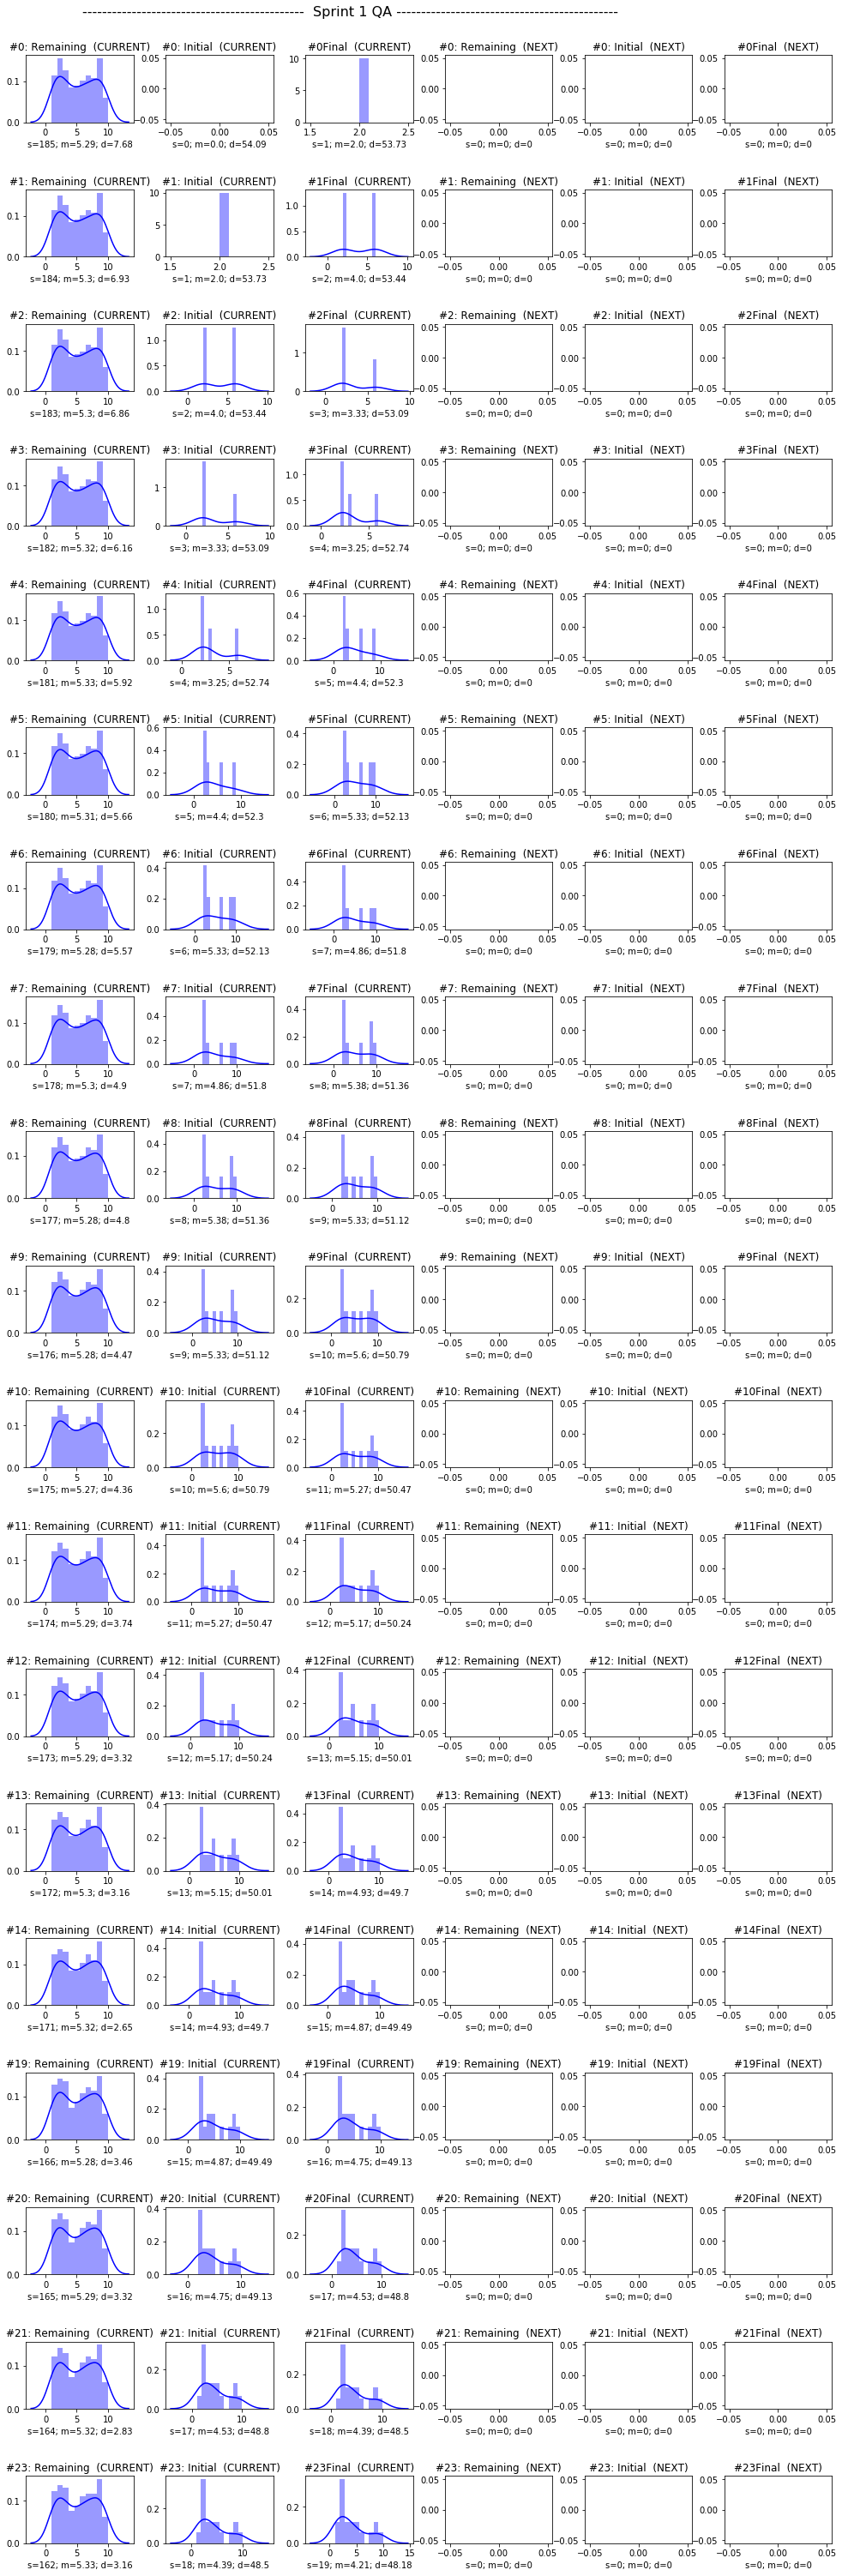

In [8]:
# Uncomment to interactively visualize the logs, and then comment again once interactive analysis is done. Commenting these
# lines after interactive analysis is completed is required as test harness can't load these visualiations
# libraries so leaving this uncommented will crash the entire test harness.
#import devanalyst.simulation.visualizations.simm_visuals as simm_visuals
#simm_visuals.renderLog(test_greedyAllocationLogs_ACTUAL['Logs'],'b')

In [ ]:
# Uncomment to interactively visualize the logs, and then comment again once interactive analysis is done. Commenting these
# lines after interactive analysis is completed is required as test harness can't load these visualiations
# libraries so leaving this uncommented will crash the entire test harness.
#import devanalyst.simulation.visualizations.simm_visuals as simm_visuals
#simm_visuals.renderLog(test_greedyAllocationLogs_EXPECTED['Logs'],'g')

<h1>test_greedyAllocation</h1>

In [9]:
# Implement test logic, and run it

#Test logic
def test_greedyAllocation():    
    output = {}
    RELEASE_DURATION = 125
    SPRINT_DURATION = 10

    # Configure models
    model = GreedyAllocationModel(SPRINT_DURATION) 
    modelsConfig = ModelsConfig([], [], model)
    modelsConfig.random.reset(271)

    teams_df, stories_df, teamsRepo, storiesRepo, ticketsRepo = tu_.initTestData(tu_.DEV_DF, tu_.PM_DF, \
                                                                             RELEASE_DURATION, SPRINT_DURATION, modelsConfig)

    # Select a team
    teamId = teams_df['Scrum Team'][0].teamId
    
    # Choose what to work on at the start of a sprint.
    SPRINT_DURATION = 10

   
    work = WorkAssignments(teamId, teamsRepo, storiesRepo, sprint=1)

    work = model.allocate(work, modelsConfig)
    
    committed_df = work.committedTime(SPRINT_DURATION)
    tasks_df = work.committedTasks()
        
    output['Committed'] = committed_df
    output['Tasks'] = tasks_df
    return output

# Run the test
test_greedyAllocation_ACTUAL = test_greedyAllocation()

In [10]:
# Uncomment to update expected output to match the actual one

# Helper method
def create_greedyAllocation_EXPECTED():
    tu_.createExpectedOutput(test_greedyAllocation_ACTUAL['Committed'],    'simm.test_greedyAllocation.Committed')
    tu_.createExpectedOutput(test_greedyAllocation_ACTUAL['Tasks'],        'simm.test_greedyAllocation.Tasks')

# Uncomment to update expected output to match the actual one, and then put the comment back
#create_greedyAllocation_EXPECTED()

In [11]:
# Load expected output, update the EXPECTED and ACTUAL dictionaries, and check test is OK
test_greedyAllocation_EXPECTED = {}

test_greedyAllocation_EXPECTED['Committed']      = tu_.loadExpectedOutput('simm.test_greedyAllocation.Committed')
test_greedyAllocation_EXPECTED['Tasks']          = tu_.loadExpectedOutput('simm.test_greedyAllocation.Tasks')

# Rounding inaccuracies in saving and loading CSV will create an artificial mismatch between ACTUAL and EXPECTED
# So round EXPECTED and ACTUAL to 6 decimal places for sensitive fields (any float)
sensitive_fields = ['Rejects (days)', 'Debugging (days)', 'Implementation (days)', 'Bandwidth',\
                    'NEXT SPRINT (days)', 'NEXT SPRINT Bandwidth']
testlets = ['Committed']
for field in sensitive_fields:
    for testlet in testlets:
        rounded = test_greedyAllocation_EXPECTED[testlet][field].apply(lambda x: round(x, 6)) # Round to 6 decimal places
        test_greedyAllocation_EXPECTED[testlet][field] = rounded
        rounded = test_greedyAllocation_ACTUAL[testlet][field].apply(lambda x: round(x, 6)) # Round to 6 decimal places
        test_greedyAllocation_ACTUAL[testlet][field] = rounded
sensitive_fields = ['Original Estimate', 'Effort Spent', 'Effort Remaining', 'Percent Achieved']
testlets = ['Tasks']
for field in sensitive_fields:
    for testlet in testlets:
        rounded = test_greedyAllocation_EXPECTED[testlet][field].apply(lambda x: round(x, 6)) # Round to 6 decimal places
        test_greedyAllocation_EXPECTED[testlet][field] = rounded
        rounded = test_greedyAllocation_ACTUAL[testlet][field].apply(lambda x: round(x, 6)) # Round to 6 decimal places
        test_greedyAllocation_ACTUAL[testlet][field] = rounded

tu_.EXPECTED['simm.test_greedyAllocation.Committed']      = test_greedyAllocation_EXPECTED['Committed']
tu_.EXPECTED['simm.test_greedyAllocation.Tasks']          = test_greedyAllocation_EXPECTED['Tasks']

tu_.ACTUAL['simm.test_greedyAllocation.Committed']        = test_greedyAllocation_ACTUAL['Committed']
tu_.ACTUAL['simm.test_greedyAllocation.Tasks']            = test_greedyAllocation_ACTUAL['Tasks']

tu_.testOK('simm.test_greedyAllocation.Committed'), \
tu_.testOK('simm.test_greedyAllocation.Tasks'), \

(True, True)

In [ ]:
test_greedyAllocation_ACTUAL['Committed']

In [ ]:
test_greedyAllocation_EXPECTED['Committed']

In [ ]:
test_greedyAllocation_ACTUAL['Tasks']

In [ ]:
test_greedyAllocation_EXPECTED['Tasks']

<h1>test_balancedAllocation</h1>

In [12]:
# Implement test logic, and run it

#Test logic
def test_balancedAllocation():    
    output = {}
    RELEASE_DURATION = 125
    SPRINT_DURATION = 10

    # Configure models
    model = BalancedAllocationModel(SPRINT_DURATION) 
    modelsConfig = ModelsConfig([], [], model)
    modelsConfig.random.reset(271)

    teams_df, stories_df, teamsRepo, storiesRepo, ticketsRepo = tu_.initTestData(tu_.DEV_DF, tu_.PM_DF, \
                                                                             RELEASE_DURATION, SPRINT_DURATION, modelsConfig)

    # Select a team
    teamId = teams_df['Scrum Team'][0].teamId
    
    # Choose what to work on at the start of a sprint.
    SPRINT_DURATION = 10

   
    work = WorkAssignments(teamId, teamsRepo, storiesRepo, sprint=1)

    work = model.allocate(work, modelsConfig)
    
    committed_df = work.committedTime(SPRINT_DURATION)
    tasks_df = work.committedTasks()
        
    output['Committed'] = committed_df
    output['Tasks'] = tasks_df
    return output, work

# Run the test
test_balancedAllocation_ACTUAL, work = test_balancedAllocation()

In [13]:
# Uncomment to update expected output to match the actual one

# Helper method
def create_balancedAllocation_EXPECTED():
    tu_.createExpectedOutput(test_balancedAllocation_ACTUAL['Committed'],    'simm.test_balancedAllocation.Committed')
    tu_.createExpectedOutput(test_balancedAllocation_ACTUAL['Tasks'],        'simm.test_balancedAllocation.Tasks')

# Uncomment to update expected output to match the actual one, and then put the comment back
#create_balancedAllocation_EXPECTED()

In [14]:
# Load expected output, update the EXPECTED and ACTUAL dictionaries, and check test is OK
test_balancedAllocation_EXPECTED = {}

test_balancedAllocation_EXPECTED['Committed']      = tu_.loadExpectedOutput('simm.test_balancedAllocation.Committed')
test_balancedAllocation_EXPECTED['Tasks']          = tu_.loadExpectedOutput('simm.test_balancedAllocation.Tasks')

# Rounding inaccuracies in saving and loading CSV will create an artificial mismatch between ACTUAL and EXPECTED
# So round EXPECTED and ACTUAL to 6 decimal places for sensitive fields (any float)
sensitive_fields = ['Rejects (days)', 'Debugging (days)', 'Implementation (days)', 'Bandwidth',\
                    'NEXT SPRINT (days)', 'NEXT SPRINT Bandwidth']
testlets = ['Committed']
for field in sensitive_fields:
    for testlet in testlets:
        rounded = test_balancedAllocation_EXPECTED[testlet][field].apply(lambda x: round(x, 6)) # Round to 6 decimal places
        test_balancedAllocation_EXPECTED[testlet][field] = rounded
        rounded = test_balancedAllocation_ACTUAL[testlet][field].apply(lambda x: round(x, 6)) # Round to 6 decimal places
        test_balancedAllocation_ACTUAL[testlet][field] = rounded
sensitive_fields = ['Original Estimate', 'Effort Spent', 'Effort Remaining', 'Percent Achieved']
testlets = ['Tasks']
for field in sensitive_fields:
    for testlet in testlets:
        rounded = test_balancedAllocation_EXPECTED[testlet][field].apply(lambda x: round(x, 6)) # Round to 6 decimal places
        test_balancedAllocation_EXPECTED[testlet][field] = rounded
        rounded = test_balancedAllocation_ACTUAL[testlet][field].apply(lambda x: round(x, 6)) # Round to 6 decimal places
        test_balancedAllocation_ACTUAL[testlet][field] = rounded

tu_.EXPECTED['simm.test_balancedAllocation.Committed']      = test_balancedAllocation_EXPECTED['Committed']
tu_.EXPECTED['simm.test_balancedAllocation.Tasks']          = test_balancedAllocation_EXPECTED['Tasks']

tu_.ACTUAL['simm.test_balancedAllocation.Committed']        = test_balancedAllocation_ACTUAL['Committed']
tu_.ACTUAL['simm.test_balancedAllocation.Tasks']            = test_balancedAllocation_ACTUAL['Tasks']

tu_.testOK('simm.test_balancedAllocation.Committed'), \
tu_.testOK('simm.test_balancedAllocation.Tasks'), \

(True, True)

In [ ]:
test_balancedAllocation_ACTUAL['Committed']

In [ ]:
test_balancedAllocation_EXPECTED['Committed']

In [ ]:
test_balancedAllocation_ACTUAL['Tasks']

In [ ]:
test_balancedAllocation_EXPECTED['Tasks']